# Get Data

In [42]:
import pandas as pd
import pandas_datareader.data as web

In [44]:
series_id = "APU0000708111"
egg = web.DataReader(series_id, "fred", start="2010-01-01")
egg.head()

,APU0000708111
DATE,
2010-01-01,1.789
2010-02-01,1.872
2010-03-01,1.822
2010-04-01,1.779
2010-05-01,1.523


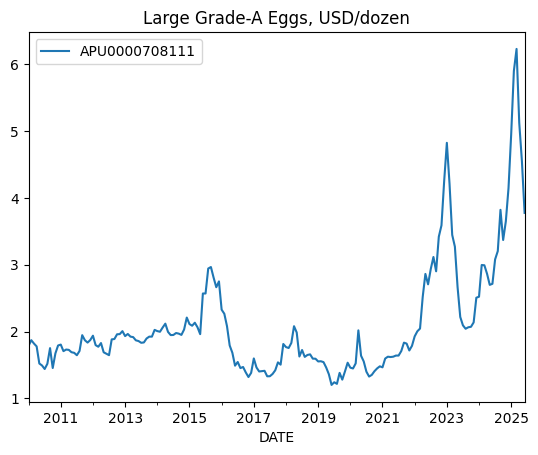

In [45]:
egg.plot(title='Large Grade-A Eggs, USD/dozen');

In [46]:
print(egg.isna().sum())

APU0000708111    0
dtype: int64


# Traditional Approaches

**ARIMA (KPSS + ADF to determine lags)**

In [9]:
# KPSS + ADF
from statsmodels.tsa.stattools import kpss, adfuller

def kpss_adf_tests(data):
  data = data.dropna()

  # no nan so can directly feed
  kpss_stat, kpss_p, *_ = kpss(data, regression='c')
  print(f'KPSS Statistic:  {kpss_stat}')
  print(f'p-value: {kpss_p}')

  adf_stat, adf_p, *_ = adfuller(data)
  print(f'ADF Statistic:  {adf_stat}')
  print(f'p-value: {adf_p}')

In [10]:
kpss_adf_tests(egg)

KPSS Statistic:  0.7347634315343913
p-value: 0.01038514258778261
ADF Statistic:  -1.930848247466466
p-value: 0.3176911367115077


In [11]:
# KPSS p < 0.05  --> not stationary, ADF p > 0.05 --> non stationary
# thus treat as non-stationary; difference once and try again
egg_diff = egg.diff().dropna()
kpss_adf_tests(egg_diff)

KPSS Statistic:  0.1320661830224348
p-value: 0.1
ADF Statistic:  -10.030498888298983
p-value: 1.5897297331201814e-17


/tmp/ipython-input-9-1112892434.py:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p, *_ = kpss(data, regression='c')


In [12]:
# now KPSS p > 0.05 --> stationary, ADF p << 0.05 --> stationary
# thus pass the differenced as stationary for ARIMA

In [13]:
!pip install pmdarima

In [14]:
# pmdarima requires downgarding np version
!pip install numpy==1.26.4

In [15]:
# auto lag selection
from pmdarima.arima import auto_arima

In [16]:
model = auto_arima(egg_diff, seasonal=False, d=None, max_p=6, max_q=6, trace=True) # aic default as well
print(model.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-17.779, Time=0.82 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-4.436, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-16.035, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-15.191, Time=0.21 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-12.333, Time=1.84 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-12.036, Time=0.41 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=1.81 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=1.46 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-14.049, Time=0.47 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-10.642, Time=2.58 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-15.312, Time=1.59 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-16.164, Time=3.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-16.391, Time=1.51 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 16.102 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  184
Model:               SARIMAX(2, 0, 2)   Log Likelihood                  13.889
Date:                Mon, 14 Jul 2025   AIC                            -17.779
Time:                        03:05:48   BIC                             -1.704
Sample:                    02-01-2010   HQIC                           -11.263
                         - 05-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7284      0.096      7.577      0.000       0.540 

In [17]:
# auto-diff selects (2, 1, 2) with AIC=-16.391 while pre-diff selects (2, 0, 2) with AIC=-17.779 --> p=q=2

In [18]:
# now get forecasting model
from statsmodels.tsa.arima.model import ARIMA
egg_model = ARIMA(egg, order=(2, 1, 2))
fitted_model = egg_model.fit()
print(fitted_model.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          APU0000708111   No. Observations:                  185
Model:                 ARIMA(2, 1, 2)   Log Likelihood                  13.889
Date:                Mon, 14 Jul 2025   AIC                            -17.779
Time:                        03:05:50   BIC                             -1.704
Sample:                    01-01-2010   HQIC                           -11.263
                         - 05-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7283      0.096      7.578      0.000       0.540       0.917
ar.L2         -0.8115      0.068    -11.939      0.000      -0.945      -0.678
ma.L1         -0.5114      0.089     -5.743      0.0

In [19]:
forecast = fitted_model.forecast(steps=3)
print(forecast)

2025-06-01    4.244207
2025-07-01    4.399007
2025-08-01    4.758275
Freq: MS, Name: predicted_mean, dtype: float64


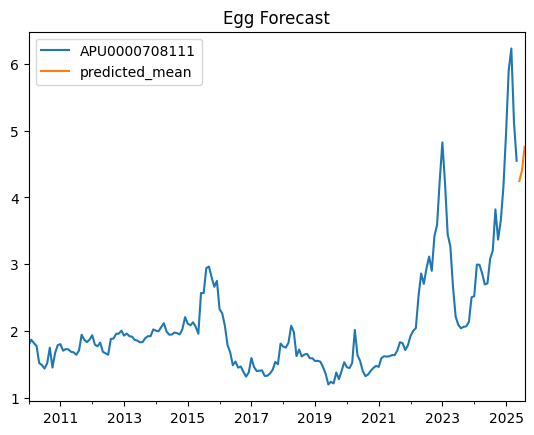

In [20]:
pd.concat([egg, forecast], axis=1).plot(title='Egg Forecast');

looks reasonable. Projects an upward trend, interestingly completely opposite to ARMA model. Shows the importance of requiring stationary

In [21]:
# to avoid np downgrade, just custom lag selection
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import matplotlib.pyplot as plt

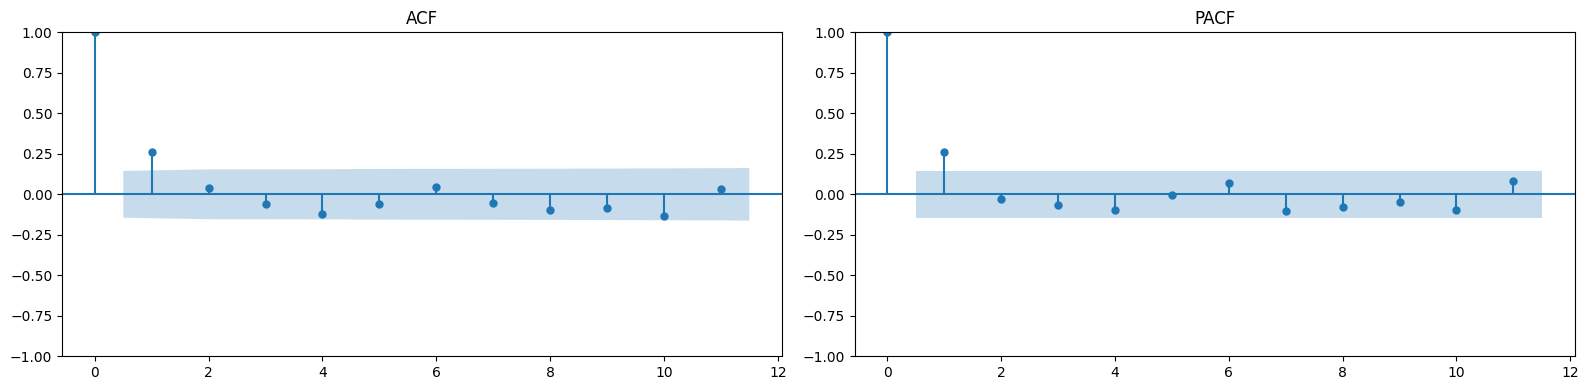

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(egg_diff, lags=11, ax=axes[0])
plot_pacf(egg_diff, lags=11, ax=axes[1], method='ywm')
axes[0].set_title('ACF')
axes[1].set_title('PACF');
plt.tight_layout()

In [23]:
# both have cutoff at p=q=1, now fit all permutations and minimize AIC score
q_cutoff = 1
p_cutoff = 1

In [24]:
import itertools
orders = [(p, 1, q) for p,q in itertools.product(range(p_cutoff+2), range(q_cutoff+2))]
fits = [ARIMA(egg, order=order).fit() for order in orders]
best_model = min(fits, key=lambda mod: mod.aic)
print(best_model.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

                               SARIMAX Results                                
Dep. Variable:          APU0000708111   No. Observations:                  185
Model:                 ARIMA(2, 1, 2)   Log Likelihood                  13.889
Date:                Mon, 14 Jul 2025   AIC                            -17.779
Time:                        03:05:58   BIC                             -1.704
Sample:                    01-01-2010   HQIC                           -11.263
                         - 05-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7283      0.096      7.578      0.000       0.540       0.917
ar.L2         -0.8115      0.068    -11.939      0.000      -0.945      -0.678
ma.L1         -0.5114      0.089     -5.743      0.0

In [25]:
# and again we determine order=(2, 1, 2)

**Extending to Seasonality (SARIMAX)**

In [26]:
# first consider that egg prices will likely show some seasonality around easter so pursue SARIMA

In [27]:
import holidays
from dateutil.easter import easter
from datetime import date

start_date = "2010-01-01"
end_date = date.today()
easter_dates = [easter(year) for year in range(2010, end_date.year+1)]

# i think this changes so necessary
easter_months = pd.to_datetime(easter_dates).to_period('M').to_timestamp()
easter_indicator = pd.Series(egg.index.isin(pd.DatetimeIndex(easter_months)), index=egg.index, name='easter').astype(int).to_frame()

In [78]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# not very scalable but ok for small pq as we hav ehere
def find_seasonal_coefs(df, exog, d, D, s=12, max_pq=2):
  best_coef = (np.inf, None)

  for p, q, P, Q in itertools.product(range(max_pq+1), repeat=4):
    # error handling
    try:
      model = SARIMAX(df, order=(p, d, q), seasonal_order=(P, D, Q, s), exog=exog)
      fitted_model = model.fit()
      if fitted_model.aic < best_coef[0]:
        best_coef = (fitted_model.aic, fitted_model)
    except:
      pass

  return best_coef if best_coef[1] is not None else None


In [29]:
score, model = find_seasonal_coefs(egg, easter_indicator, d=1, D=0, s=12, max_pq=2)
print(model.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used

                               SARIMAX Results                                
Dep. Variable:          APU0000708111   No. Observations:                  185
Model:               SARIMAX(2, 1, 2)   Log Likelihood                  15.657
Date:                Mon, 14 Jul 2025   AIC                            -19.314
Time:                        03:07:51   BIC                             -0.024
Sample:                    01-01-2010   HQIC                           -11.496
                         - 05-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
easter         0.0664      0.040      1.639      0.101      -0.013       0.146
ar.L1          0.7040      0.101      6.995      0.000       0.507       0.901
ar.L2         -0.7988      0.084     -9.556      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [30]:
# order of (2, 1, 2) again makes sense, but now reach an even lower AIC
# now examine the forecast

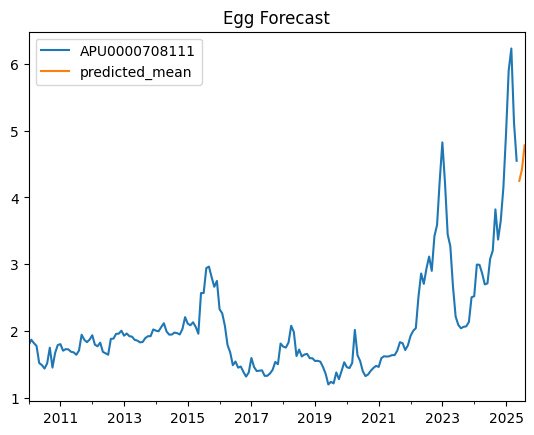

In [31]:
h = 3
future_idx  = pd.date_range(egg.index[-1] + pd.offsets.MonthBegin(), periods=h, freq="MS")

# we've already passed easter this year so these can be zero, would have to redo as before
future_easter = pd.Series(np.zeros(h), index=future_idx, name='easter').to_frame()
seasonal_forecast = model.get_forecast(steps=h, exog=future_easter)
seasonal_forecast_mean = seasonal_forecast.predicted_mean
pd.concat([egg, seasonal_forecast_mean], axis=1).plot(title='Egg Forecast');

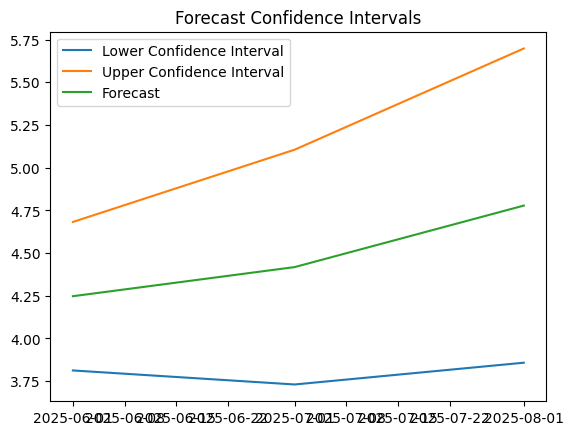

In [32]:
plt.plot(seasonal_forecast.conf_int());
plt.plot(seasonal_forecast_mean);
plt.title('Forecast Confidence Intervals');
plt.legend(['Lower Confidence Interval', 'Upper Confidence Interval','Forecast']);

In [33]:
# these seem slightly wide to be honest ~ 12% spread on CI

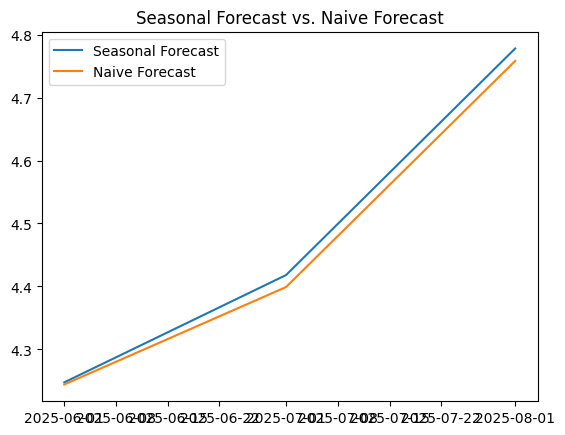

In [34]:
plt.plot(seasonal_forecast.predicted_mean);
plt.plot(forecast)
plt.title('Seasonal Forecast vs. Naive Forecast');
plt.legend(['Seasonal Forecast', 'Naive Forecast']);

These are fairly similar, but the seasonal forecast appears to be a bit more optimistic, even outside of the actual Easter window.

**Extending Further with Structural Breaks (Feb-2022 Avian Flu Outbreak)**

In [35]:
# define break point and create indicator/heaviside style series
flu_break = pd.to_datetime('2022-02-01')
flu_indicator = pd.Series(egg.index >= flu_break, index=egg.index, name='flu').astype(int).to_frame()

In [36]:
# rerun find best SARIMAX
score, break_model = find_seasonal_coefs(egg, flu_indicator, 1, 0, s=12, max_pq=2)
print(break_model.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used

                               SARIMAX Results                                
Dep. Variable:          APU0000708111   No. Observations:                  185
Model:               SARIMAX(2, 1, 2)   Log Likelihood                  13.919
Date:                Mon, 14 Jul 2025   AIC                            -15.838
Time:                        03:09:58   BIC                              3.452
Sample:                    01-01-2010   HQIC                            -8.019
                         - 05-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
flu           -0.0526      0.393     -0.134      0.894      -0.823       0.717
ar.L1          0.7213      0.097      7.403      0.000       0.530       0.912
ar.L2         -0.8099      0.068    -11.867      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [37]:
# order of (2, 1, 2) again but higher AIC now

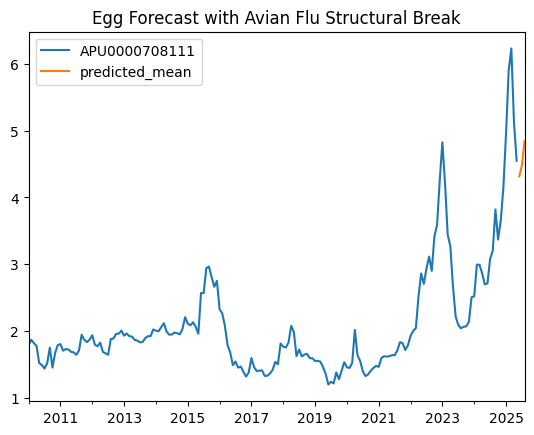

In [38]:
# we've already passed the break point so just ones
future_flu = pd.Series(np.ones(h), index=future_idx, name='easter').to_frame()
flu_forecast = model.get_forecast(steps=h, exog=future_flu)
flu_forecast_mean = flu_forecast.predicted_mean
pd.concat([egg, flu_forecast_mean], axis=1).plot(title='Egg Forecast with Avian Flu Structural Break');

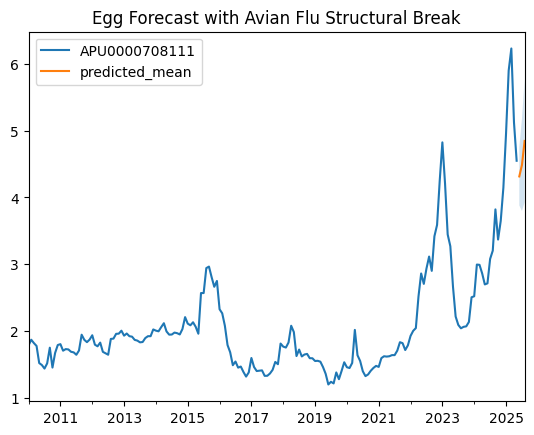

In [39]:
# plot with ci
flu_ci = flu_forecast.conf_int()
pd.concat([egg, flu_forecast_mean]).plot()
plt.fill_between(flu_ci.index, flu_ci.iloc[:,0], flu_ci.iloc[:,1], alpha=.2)
plt.title('Egg Forecast with Avian Flu Structural Break'); plt.show()

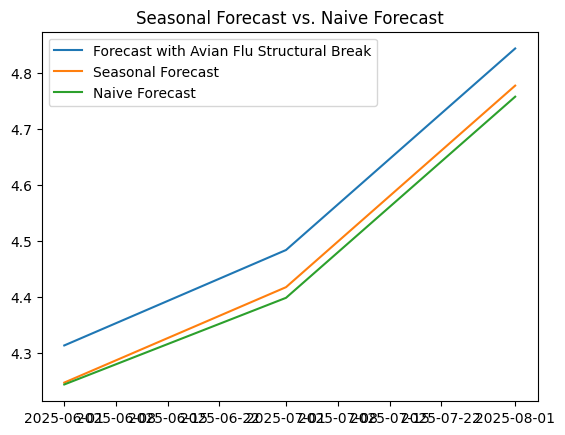

In [40]:
plt.plot(flu_forecast_mean)
plt.plot(seasonal_forecast.predicted_mean);
plt.plot(forecast)
plt.title('Seasonal Forecast vs. Naive Forecast');
plt.legend(['Forecast with Avian Flu Structural Break', 'Seasonal Forecast', 'Naive Forecast']);

Even more optimistic

**Combining Structural + Seasonal Factors**

In [41]:
# combine future_easter+flu_indicator
exog = pd.concat([easter_indicator, flu_indicator], axis=1)
print(exog.head())
score, full_model = find_seasonal_coefs(egg, exog, 1, 0, s=12, max_pq=2)
print(full_model.summary())

            easter  flu
DATE                   
2010-01-01       0    0
2010-02-01       0    0
2010-03-01       0    0
2010-04-01       1    0
2010-05-01       0    0


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

                               SARIMAX Results                                
Dep. Variable:          APU0000708111   No. Observations:                  185
Model:               SARIMAX(2, 1, 2)   Log Likelihood                  15.692
Date:                Mon, 14 Jul 2025   AIC                            -17.383
Time:                        03:12:22   BIC                              5.122
Sample:                    01-01-2010   HQIC                            -8.262
                         - 05-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
easter         0.0664      0.042      1.599      0.110      -0.015       0.148
flu           -0.0554      0.358     -0.155      0.877      -0.758       0.647
ar.L1          0.6973      0.101      6.901      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


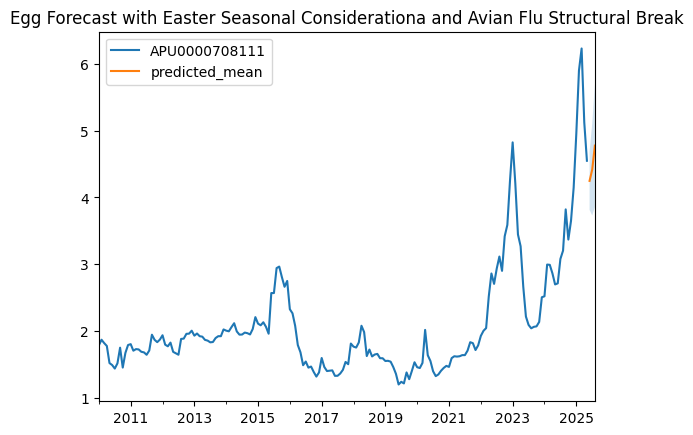

In [42]:
future_exog = pd.concat([future_easter, future_flu], axis=1)
full_forecast = full_model.get_forecast(steps=h, exog=future_exog)
full_forecast_mean = full_forecast.predicted_mean
full_ci = full_forecast.conf_int()
pd.concat([egg, full_forecast_mean]).plot()
plt.fill_between(full_ci.index, full_ci.iloc[:,0], full_ci.iloc[:,1], alpha=.2)
plt.title('Egg Forecast with Easter Seasonal Considerationa and Avian Flu Structural Break'); plt.show()

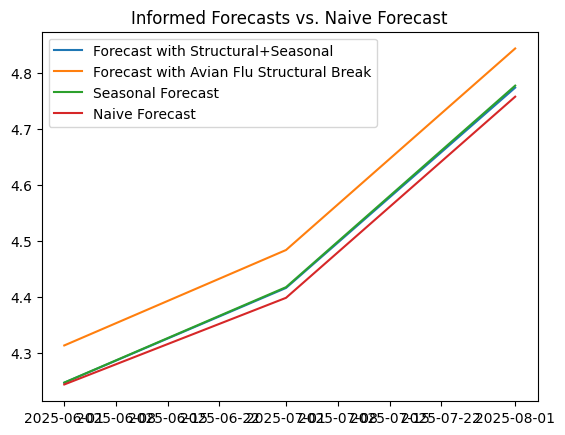

In [43]:
plt.plot(full_forecast_mean)
plt.plot(flu_forecast_mean)
plt.plot(seasonal_forecast.predicted_mean);
plt.plot(forecast)
plt.title('Informed Forecasts vs. Naive Forecast')
plt.legend(['Forecast with Structural+Seasonal', 'Forecast with Avian Flu Structural Break', 'Seasonal Forecast', 'Naive Forecast']);

much more conservative considering both effects

# ML Approaches

Util + Setup

In [6]:
!pip install pytorch_forecasting pytorch_lightning

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 362, in run
    resolver = self.make_resolver(
               ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 177, in make_resolver
    return pip._internal.resolution.resolvelib.resolver.Resolver(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 58, in __init__
    self.factory = Factory(
                  

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from xgboost import XGBRegressor
from tensorflow import keras
import torch
import pytorch_lightning as pl
from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer

In [8]:
# forecast one year
h = 12
n_splits = 5

In [9]:
# metrics
def metrics(y_data, y_pred):
  mse = mean_squared_error(y_data, y_pred)
  mae = mean_absolute_error(y_data, y_pred)
  return {"mse": mse, "mae": mae}

# train-test split
def rolling_splits(df, horizon=h, n_splits=n_splits):
  tscv = TimeSeriesSplit(n_splits=n_splits, test_size=horizon)
  for train_idx, test_idx in tscv.split(df):
    yield df.iloc[train_idx], df.iloc[test_idx] # series of indices

In [47]:
# make set for supervision
df_feat = pd.DataFrame({"price": egg["APU0000708111"]})

import holidays
from dateutil.easter import easter
from datetime import date

start_date = "2010-01-01"
end_date = date.today()
easter_dates = [easter(year) for year in range(2010, end_date.year+1)]

# this changes so necessary
easter_months = pd.to_datetime(easter_dates).to_period('M').to_timestamp()

In [48]:
def make_features():
    df = pd.DataFrame({"price": egg["APU0000708111"]})
    for lag in [1, 2, 3, 12]:
        df[f"lag_{lag}"] = df.price.shift(lag)
    for w in [3, 6]:
        df[f"roll_mean_{w}"] = df.price.rolling(w).mean()
    df["month_sin"] = np.sin(2*np.pi*df.index.month/12)
    df["month_cos"] = np.cos(2*np.pi*df.index.month/12)
    df["easter"] = df.index.isin(easter_months).astype(int)
    df["af"]   = (df.index >= "2022-02-01").astype(int)
    return df.dropna()

df = make_features()
df.head()

,price,lag_1,lag_2,lag_3,lag_12,roll_mean_3,roll_mean_6,month_sin,month_cos,easter,af
DATE,,,,,,,,,,,
2011-01-01,1.806,1.793,1.675,1.456,1.789,1.758000,1.667000,0.500000,8.660254e-01,0,0
2011-02-01,1.708,1.806,1.793,1.675,1.872,1.769000,1.698500,0.866025,5.000000e-01,0,0
2011-03-01,1.732,1.708,1.806,1.793,1.822,1.748667,1.695000,1.000000,6.123234e-17,0,0
2011-04-01,1.727,1.732,1.708,1.806,1.779,1.722333,1.740167,0.866025,-5.000000e-01,1,0
2011-05-01,1.692,1.727,1.732,1.708,1.523,1.717000,1.743000,0.500000,-8.660254e-01,0,0


In [12]:
# split dataset
train_cut = "2023-01-01"
train_df = df.loc[:train_cut]
test_df = df.loc[train_cut:]

X_train, y_train = train_df.drop(columns="price"), train_df["price"]
X_test,  y_test  = test_df.drop(columns="price"),  test_df["price"]

**XGBoost**

In [13]:
xgb = XGBRegressor(n_estimators=400, max_depth=4, learning_rate=0.03, subsample=0.8, colsample_bytree=0.8, objective='reg:squarederror')
xgb.fit(X_train, y_train)
xgb_pred = pd.Series(xgb.predict(X_test))
print(metrics(y_test, xgb_pred))

{'mse': 0.31688377584086874, 'mae': 0.42301260712941485}


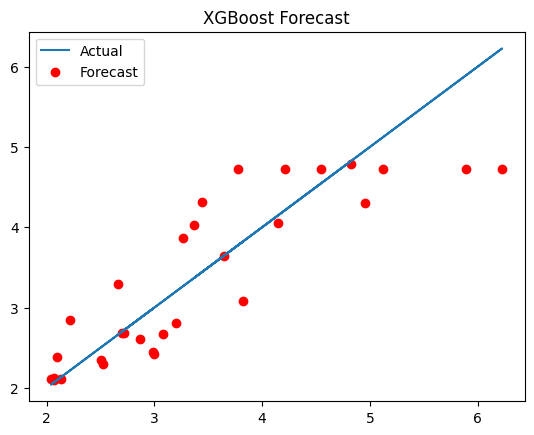

In [14]:
plt.plot(egg.loc[train_cut:], y_test)
plt.scatter(egg.loc[train_cut:], xgb_pred, color='r')
plt.title('XGBoost Forecast')
plt.legend(['Actual', 'Forecast'])
plt.show()

In [15]:
# does not look great

**LSTM**

In [16]:
# time series --> supervised learning dataset
seq_len = 12
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df[["price"]])

def series_to_supervised(series, seq_len, n_out):
  X, y = [], []
  for i in range(len(series)-seq_len-n_out+1):
    X.append(series[i:i+seq_len])
    y.append(series[i+seq_len:i+seq_len+n_out])

  return np.array(X), np.array(y)

In [17]:
X_lstm, y_lstm = series_to_supervised(scaled_df, seq_len, 1)
split_idx = len(X_lstm) - seq_len
X_train_lstm, X_test_lstm = X_lstm[:split_idx], X_lstm[split_idx:]
y_train_lstm, y_test_lstm = y_lstm[:split_idx], y_lstm[split_idx:]

In [18]:
# define LSTM
lstm = keras.Sequential()
lstm.add(keras.layers.LSTM(32, activation='tanh', input_shape=(seq_len, 1)))
lstm.add(keras.layers.Dense(1))
lstm.compile(optimizer="adam", loss="mse")

lstm.fit(X_train_lstm, y_train_lstm, epochs=200, validation_data=(X_test_lstm, y_test_lstm), verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
lstm_pred = scaler.inverse_transform(lstm.predict(X_test_lstm).reshape(-1, 1))
lstm_pred = pd.Series(lstm_pred.flatten())
y_test_rescale = scaler.inverse_transform(y_test_lstm.flatten().reshape(-1, 1))
y_test_lstm = pd.Series(y_test_rescale.flatten())
print(metrics(y_test_lstm, lstm_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
{'mse': 0.4503196228061248, 'mae': 0.5810116655031842}


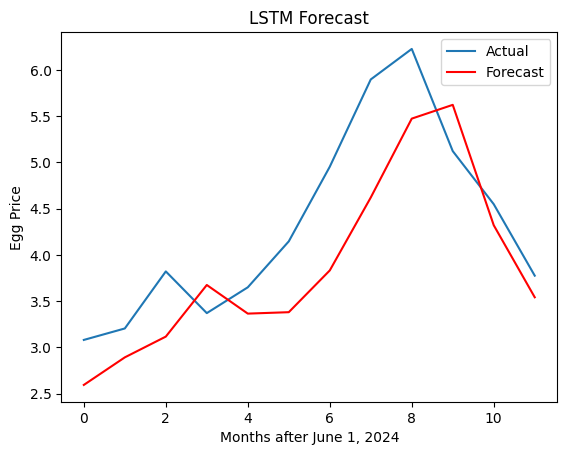

In [20]:
plt.plot(y_test_lstm)
plt.plot(lstm_pred, color='r')
plt.title('LSTM Forecast')
plt.legend(['Actual', 'Forecast'])
plt.ylabel('Egg Price')
plt.xlabel('Months after June 1, 2024')
plt.show()

In [21]:
# looks pretty solid

Temporal Fusion Transformer (TFT)

In [22]:
# prep dataset
ts = df.reset_index()
ts["time_idx"] = np.arange(len(ts))
ts["series"] = "0"
ts.tail()

enc_len, pred_len = 24, 12
cut_date = "2023-01-01"
split_idx = ts.index[ts["DATE"] >= cut_date][0]

train_ctx = ts.iloc[:split_idx]
val_ctx   = ts.iloc[split_idx-enc_len:]

In [33]:
train_ds = TimeSeriesDataSet(
    train_ctx,
    time_idx="time_idx",
    target="price",
    group_ids=["series"],
    min_encoder_length=enc_len, # static lengths
    max_encoder_length=enc_len,
    min_prediction_length=pred_len,
    max_prediction_length=pred_len,
    static_categoricals=["series"],
    time_varying_known_reals=["time_idx", "month_sin", "month_cos", "easter", "af"],
    time_varying_unknown_reals=["price", "lag_1","lag_2","lag_3","lag_12", "roll_mean_3","roll_mean_6"],
)

val_ds = TimeSeriesDataSet(
    val_ctx,
    time_idx="time_idx",
    target="price",
    group_ids=["series"],
    min_encoder_length=enc_len, # static lengths
    max_encoder_length=enc_len,
    min_prediction_length=pred_len,
    max_prediction_length=pred_len,
    static_categoricals=["series"],
    time_varying_known_reals=["time_idx", "month_sin", "month_cos", "easter", "af"],
    time_varying_unknown_reals=["price", "lag_1","lag_2","lag_3","lag_12", "roll_mean_3","roll_mean_6"],
)

pl.seed_everything(42)
train_loader = train_ds.to_dataloader(
                   train=True,
                   batch_size=64,
                   shuffle=True,
                   num_workers=0)

val_loader   = val_ds.to_dataloader(
                   train=False,
                   batch_size=64,
                   shuffle=False,
                   num_workers=0)

INFO:lightning_fabric.utilities.seed:Seed set to 42


In [24]:
!pip install "pytorch-lightning<2.2" -U # need to rectify pl backwards dependency

In [34]:
# TFT
from pytorch_forecasting.metrics import MAE
from lightning.pytorch import Trainer # need to rectify pl backwards dependency
tft = TemporalFusionTransformer.from_dataset(
          train_ds, learning_rate=1e-3, hidden_size=32, attention_head_size=4,
          dropout=0.1, loss=MAE())
trainer = Trainer(max_epochs=30, accelerator="auto", enable_checkpointing=False, enable_progress_bar=True)

/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [35]:
trainer.fit(tft, train_loader, val_loader)

INFO: 
   | Name                               | Type                            | Params | Mode 
------------------------------------------------------------------------------------------------
0  | loss                               | MAE                             | 0      | train
1  | logging_metrics                    | ModuleList                      | 0      | train
2  | input_embeddings                   | MultiEmbedding                  | 1      | train
3  | prescalers                         | ModuleDict                      | 192    | train
4  | static_variable_selection          | VariableSelectionNetwork        | 96     | train
5  | encoder_variable_selection         | VariableSelectionNetwork        | 12.8 K | train
6  | decoder_variable_selection         | VariableSelectionNetwork        | 5.0 K  | train
7  | static_context_variable_selection  | GatedResidualNetwork            | 4.3 K  | train
8  | static_context_initial_hidden_lstm | GatedResidualNetwork            | 4

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/lightning/pytorch/loops/fit_loop.py:310: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=30` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.


In [66]:
raw_pred = tft.predict(val_loader, return_x=True, return_y=True, return_index=True)
y_pred = raw_pred.y[0]
index_pred = raw_pred.index

INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


Text(0.5, 1.0, 'TFT Forecast')

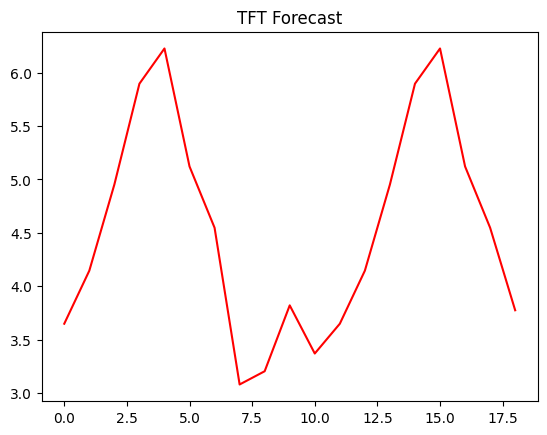

In [77]:
pred_flat = y_pred.reshape(-1).cpu().numpy()
idx_flat = index_pred["time_idx"]
df_pred = df_feat.iloc[idx_flat]
y_true = df_feat.iloc[idx_flat]["price"]
#plt.plot(y_true[-19:])
plt.plot(pred_flat[-19:], color='r')
plt.title('TFT Forecast')
#plt.legend(['Actual', 'Forecast'])

In [ ]:
# looks like the sinusoidal features creep in a lot...

In [73]:
mae = mean_absolute_error(y_true, pred_flat[-19:])
rmse = mean_squared_error(y_true, pred_flat[-19:])
print(mae, rmse)

1.7046842534918536 4.097351242767957


Ensemble Tree + Deep historically tend to perform very well

In [87]:
# 0.5 * xgb_predict + 0.5 * lstm_pred

numpy.ndarray

# Agentic Workflow

**Including Reasoning and Agents**

In [ ]:
# exogeneous feature with agents researching egg market + reasoning, fallback to sentiment analysis

In [1]:
!pip install langchain langgraph openai tiktoken faiss-cpu
!pip install sentence-transformers newsapi-python

In [2]:
!apt-get -q install -y graphviz
!pip install -q graphviz

Reading package lists...
Building dependency tree...
Reading state information...
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [3]:
# api keys
export NEWSAPI_KEY=
export OPENAI_API_KEY=

In [4]:
import os, json, datetime as dt, requests, pandas as pd
from tqdm import tqdm

USE_OPENAI = True
VECTOR_FILE = "egg_news.faiss"
META_FILE = "egg_news_meta.json"
EVENTS_FILE = "events_daily.parquet"
K_RETRIEVE = 5

from sentence_transformers import SentenceTransformer
import faiss, numpy as np
from transformers import pipeline
from newsapi import NewsApiClient

In [5]:
# load transformers
embed_model = SentenceTransformer("sentence-t5-base")
finbert = pipeline("sentiment-analysis", model="ProsusAI/finbert")

# fallback scoring with sentiment analysis
def finbert_score(text: str) -> float:
    lab = finbert(text)[0]
    return {"positive": +1, "negative": -1}.get(lab["label"], 0) * lab["score"]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/219M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/115 [00:00<?, ?B/s]

2_Dense/model.safetensors:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

2_Dense/pytorch_model.bin:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

2_Dense/rust_model.ot:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


In [6]:
# get news
def fetch_wire_news():
    nac = NewsApiClient(api_key=NEWSAPI_KEY) # NEWSAPI_KEY HERE!!!!!!!!!!!!!!
    try:
        res = nac.get_everything(
            q="(eggs OR poultry OR avian flu) AND price",
            language="en", sort_by="publishedAt", page_size=100)
        return [{
        "ts": pd.to_datetime(a["publishedAt"]),
        "source": a["source"]["name"],
        "title": a["title"],
        "body": a["description"] or ""
    } for a in res["articles"]]
    except:
        raise Exception("NewsAPI error")

# create news db
df_today = pd.DataFrame(fetch_wire_news())
df_today.drop_duplicates(subset=["title"], inplace=True)

# store
if os.path.exists(VECTOR_FILE):
    index = faiss.read_index(VECTOR_FILE)
    with open(META_FILE) as f:
        meta = json.load(f)
else:
    index, meta = None, []

new_docs = (df_today["title"] + " " + df_today["body"]).tolist()
new_emb = embed_model.encode(new_docs, convert_to_numpy=True)

if index is None:
    index = faiss.IndexFlatL2(new_emb.shape[1])
    index.add(new_emb)
    meta.extend(df_today.to_dict(orient="records"))
else:
    index.add(new_emb)
    meta.extend(df_today.to_dict(orient="records"))

In [7]:
# convert meta datetime to string
for m in meta:
    m["ts"] = m["ts"].isoformat()

In [8]:
faiss.write_index(index, VECTOR_FILE)
with open(META_FILE, "w") as f:
    json.dump(meta, f)

In [9]:
!pip install langchain_community # ChatOpenAI dependency

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.2 MB/s eta 0:00:00


In [24]:
from langgraph.graph import StateGraph, START, END
from langchain.docstore.document import Document
from langchain.chat_models import ChatOpenAI
from langchain.schema import AIMessage, SystemMessage, HumanMessage

In [28]:
# faiss retreival
def retrieve(query: str):
    q_emb = embed_model.encode([query])
    _, I  = index.search(q_emb, K_RETRIEVE)
    return [
        Document(
            page_content=meta[i]["title"] + " " + meta[i]["body"],
            metadata=meta[i],
        )
        for i in I[0]
    ]

# reasoning prompting
SYSTEM_PROMPT = (
    "You are AgriPrice‑Agent. "
    "Given poultry/egg news snippets you must output a *JSON object only*, "
    "no extra text."
)

USER_PROMPT = """For each snippet inside triple backticks, output ONE JSON line:
{{"category": ["avian_flu","feed_cost","policy","demand_holiday","other"],
  "price_impact": -1..+1,
  "confidence": 0..1,
  "rationale": "<short quote>"}}   <!-- braces doubled -->
Skip snippets irrelevant to egg/poultry prices.
```{snippets}```"""


llm = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0.2,
    api_key=OPENAI_API_KEY,
    response_format={"type": "json_object"}
)


# retrieve node
def retrieve_node(state: dict) -> dict:
    query = state["query"]
    docs = retrieve(query)
    state["docs"] = docs
    return state

# reasoning node
def reason_node(state: dict) -> dict:
    docs   = state["docs"]
    joined = "\n\n".join([d.page_content[:800] for d in docs])

    if USE_OPENAI:
        # call gpt4
        resp = llm.invoke([
            SystemMessage(content=SYSTEM_PROMPT),
            HumanMessage(content=USER_PROMPT.format(snippets=joined))
        ])
        # configured to be json output
        state["impact_json"] = resp.content.strip()
    else:
        # fallback: FinBERT polarity
        score = finbert_score(joined)
        state["impact_json"] = json.dumps([{
            "category": "unspecified",
            "price_impact": score,
            "confidence": 0.3,
            "rationale": "FinBERT fallback"
        }])
    return state

# LangGraph workflow assembly
g = StateGraph(dict) # state is just a standard dict
g.add_node("retrieve", retrieve_node)
g.add_node("reason",   reason_node)

# start with retrieve
g.set_entry_point("retrieve")

# edges
g.add_edge("retrieve", "reason")
g.add_edge("reason", END)

agent = g.compile()

                    response_format was transferred to model_kwargs.
                    Please confirm that response_format is what you intended.


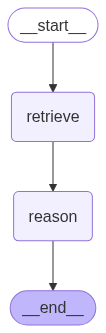

In [29]:
from IPython.display import Image, display
display(Image(agent.get_graph().draw_mermaid_png()))

In [36]:
# have agent process the past year
for i in range(12):
  today_str = dt.date.today().isoformat()
  date_str = (dt.date.today() - dt.timedelta(days=30 * i)).isoformat()
  records   = []

  for title, body in zip(df_today["title"], df_today["body"]):
      # invoke agent
      state_out = agent.invoke({"query": title + " " + body})

      # get JSON string produced by the reasoner node
      impact_str = state_out.get("impact_json", "").strip()
      if not impact_str:
          continue

      # for each reasoning line: split by newline, parse each line safely
      for line in impact_str.splitlines():
          try:
              rec = json.loads(line)
              rec["date"] = date_str
              records.append(rec)
          except json.JSONDecodeError:
              # skip if deformed
              continue

  # store
  if records:
      df_ev = pd.DataFrame(records)
      if os.path.exists(EVENTS_FILE):
          df_old = pd.read_parquet(EVENTS_FILE)
          df_ev  = pd.concat([df_old, df_ev], ignore_index=True)
          df_ev.drop_duplicates(subset=["date", "title"], keep="last", inplace=True) # in case of re-run
      df_ev.to_parquet(EVENTS_FILE, index=False)
      print(f"Appended {len(records)} impact records → {EVENTS_FILE}")
  else:
      print("No impact events today.")

Appended 86 impact records → events_daily.parquet
Appended 86 impact records → events_daily.parquet
Appended 86 impact records → events_daily.parquet
Appended 86 impact records → events_daily.parquet
Appended 86 impact records → events_daily.parquet
Appended 86 impact records → events_daily.parquet
Appended 86 impact records → events_daily.parquet
Appended 86 impact records → events_daily.parquet
Appended 86 impact records → events_daily.parquet
Appended 86 impact records → events_daily.parquet
Appended 86 impact records → events_daily.parquet
Appended 86 impact records → events_daily.parquet


In [37]:
df_ev = pd.read_parquet("events_daily.parquet")
df_ev["price_adj"] = df_ev["price_impact"] * df_ev["confidence"]

monthly_score = (df_ev
    .groupby(pd.to_datetime(df_ev["date"]).dt.to_period("M"))["price_adj"]
    .sum()
    .rename("news_price_score")
    .to_timestamp()
    .asfreq("MS")
    .fillna(0)
)

In [41]:
monthly_score.tail()

,news_price_score
date,
2025-03-01,-6.500
2025-04-01,-7.940
2025-05-01,-8.229
2025-06-01,-16.140
2025-07-01,-15.700


In [91]:
df_feat = make_features()
df_feat = df_feat.join(monthly_score, how="right")
tmp_drop = df_feat.index[11]
df_feat = df_feat[df_feat.index != tmp_drop]
df_feat["news_price_score"].fillna(0, inplace=True)
df_feat.tail()

,price,lag_1,lag_2,lag_3,lag_12,roll_mean_3,roll_mean_6,month_sin,month_cos,easter,af,news_price_score
date,,,,,,,,,,,,
2025-02-01,5.897,4.953,4.146,3.649,2.996,4.998667,4.306000,8.660254e-01,5.000000e-01,0.0,1.0,-6.240
2025-03-01,6.227,5.897,4.953,4.146,2.992,5.692333,4.707000,1.000000e+00,6.123234e-17,0.0,1.0,-6.500
2025-04-01,5.122,6.227,5.897,4.953,2.864,5.748667,4.999000,8.660254e-01,-5.000000e-01,1.0,1.0,-7.940
2025-05-01,4.548,5.122,6.227,5.897,2.699,5.299000,5.148833,5.000000e-01,-8.660254e-01,0.0,1.0,-8.229
2025-06-01,3.775,4.548,5.122,6.227,2.715,4.481667,5.087000,1.224647e-16,-1.000000e+00,0.0,1.0,-16.140


SARIMAX Forecast

In [95]:
# apply to sarimax
import itertools
exog=df_feat[["easter","af","news_price_score"]]
aic_score, agent_model = find_seasonal_coefs(df_feat["price"], exog, 1, 0, s=12, max_pq=2)

In [96]:
print(agent_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                   11
Model:               SARIMAX(0, 1, 1)   Log Likelihood                  -7.721
Date:                Sat, 19 Jul 2025   AIC                             25.442
Time:                        21:14:12   BIC                             26.955
Sample:                    08-01-2024   HQIC                            23.783
                         - 06-01-2025                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
easter              -0.4820      0.312     -1.547      0.122      -1.093       0.129
af                  -0.0024   2.96e-05    -81.625      0.000      -0.002      -0.002
news_price_score    -0.0806 

In [98]:
h = 3
future_idx  = pd.date_range(df_feat.index[-1] + pd.offsets.MonthBegin(), periods=h, freq="MS")

future_easter = pd.Series(np.zeros(h), index=future_idx, name='easter').to_frame()
future_flu = pd.Series(np.ones(h), index=future_idx, name='af').to_frame()
future_news = pd.Series(np.zeros(h), index=future_idx, name='news_price_score').to_frame()

,news_price_score
2025-07-01,0.0
2025-08-01,0.0
2025-09-01,0.0


In [107]:
future_exog = pd.concat([future_easter, future_flu, future_news], axis=1)

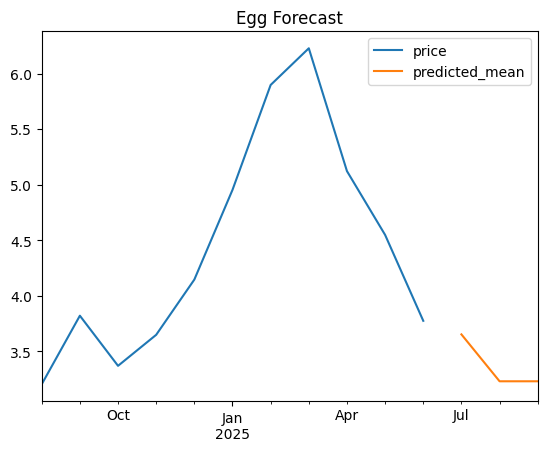

In [108]:
agent_forecast = agent_model.get_forecast(steps=h, exog=future_exog)
agent_forecast_mean = agent_forecast.predicted_mean
pd.concat([df_feat["price"], agent_forecast_mean], axis=1).plot(title='Egg Forecast');

Very negative now! Stark difference to excluding

Now can add to XGBoost, LSTM, TFT Forecast etc

# Kalshi API Code (From Official Site)

In [ ]:
!pip install cryptography

In [ ]:
import requests
import json
from datetime import datetime as dt
from urllib3.exceptions import HTTPError
from dateutil import parser
from typing import Any, Dict, List, Optional, Tuple
from datetime import datetime
from datetime import timedelta

from cryptography.hazmat.primitives import serialization
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.asymmetric import padding, rsa
from cryptography.exceptions import InvalidSignature
import time
import base64


class KalshiClient:
    """A simple client that allows utils to call authenticated Kalshi API endpoints."""
    def __init__(
        self,
        host: str,
        key_id: str,
        private_key: rsa.RSAPrivateKey,
        user_id: Optional[str] = None,
    ):
        """Initializes the client and logs in the specified user.
        Raises an HttpError if the user could not be authenticated.
        """

        self.host = host
        self.key_id: key_id
        self.private_key: private_key
        self.user_id = user_id
        self.last_api_call = datetime.now()

    """Built in rate-limiter. We STRONGLY encourage you to keep
    some sort of rate limiting, just in case there is a bug in your
    code. Feel free to adjust the threshold"""
    def rate_limit(self) -> None:
        # Adjust time between each api call
        THRESHOLD_IN_MILLISECONDS = 100

        now = datetime.now()
        threshold_in_microseconds = 1000 * THRESHOLD_IN_MILLISECONDS
        threshold_in_seconds = THRESHOLD_IN_MILLISECONDS / 1000
        if now - self.last_api_call < timedelta(microseconds=threshold_in_microseconds):
            time.sleep(threshold_in_seconds)
        self.last_api_call = datetime.now()

    def post(self, path: str, body: dict) -> Any:
        """POSTs to an authenticated Kalshi HTTP endpoint.
        Returns the response body. Raises an HttpError on non-2XX results.
        """
        self.rate_limit()

        response = requests.post(
            self.host + path, data=body, headers=self.request_headers("POST", path)
        )
        self.raise_if_bad_response(response)
        return response.json()

    def get(self, path: str, params: Dict[str, Any] = {}) -> Any:
        """GETs from an authenticated Kalshi HTTP endpoint.
        Returns the response body. Raises an HttpError on non-2XX results."""
        self.rate_limit()

        response = requests.get(
            self.host + path, headers=self.request_headers("GET", path), params=params
        )
        print(self.host + path)
        self.raise_if_bad_response(response)
        return response.json()

    def delete(self, path: str, params: Dict[str, Any] = {}) -> Any:
        """Posts from an authenticated Kalshi HTTP endpoint.
        Returns the response body. Raises an HttpError on non-2XX results."""
        self.rate_limit()

        response = requests.delete(
            self.host + path, headers=self.request_headers("DELETE", path), params=params
        )
        self.raise_if_bad_response(response)
        return response.json()

    def request_headers(self, method: str, path: str) -> Dict[str, Any]:
        # Get the current time
        current_time = datetime.now()

        # Convert the time to a timestamp (seconds since the epoch)
        timestamp = current_time.timestamp()

        # Convert the timestamp to milliseconds
        current_time_milliseconds = int(timestamp * 1000)
        timestampt_str = str(current_time_milliseconds)

        # remove query params
        path_parts = path.split('?')


        msg_string = timestampt_str + method + '/trade-api/v2' + path_parts[0]
        signature = self.sign_pss_text(msg_string)

        headers = {"Content-Type": "application/json"}

        headers["KALSHI-ACCESS-KEY"] = self.key_id
        headers["KALSHI-ACCESS-SIGNATURE"] = signature
        headers["KALSHI-ACCESS-TIMESTAMP"] = timestampt_str
        return headers

    def sign_pss_text(self, text: str) -> str:
        # Before signing, we need to hash our message.
        # The hash is what we actually sign.
        # Convert the text to bytes
        message = text.encode('utf-8')
        try:
            signature = self.private_key.sign(
                message,
                padding.PSS(
                    mgf=padding.MGF1(hashes.SHA256()),
                    salt_length=padding.PSS.DIGEST_LENGTH
                ),
                hashes.SHA256()
            )
            return base64.b64encode(signature).decode('utf-8')
        except InvalidSignature as e:
            raise ValueError("RSA sign PSS failed") from e

    def raise_if_bad_response(self, response: requests.Response) -> None:
        if response.status_code not in range(200, 299):
            raise HttpError(response.reason, response.status_code)

    def query_generation(self, params:dict) -> str:
        relevant_params = {k:v for k,v in params.items() if v != None}
        if len(relevant_params):
            query = '?'+''.join("&"+str(k)+"="+str(v) for k,v in relevant_params.items())[1:]
        else:
            query = ''
        return query

class HttpError(Exception):
    """Represents an HTTP error with reason and status code."""
    def __init__(self, reason: str, status: int):
        super().__init__(reason)
        self.reason = reason
        self.status = status

    def __str__(self) -> str:
        return "HttpError(%d %s)" % (self.status, self.reason)

class ExchangeClient(KalshiClient):
    def __init__(self,
                    exchange_api_base: str,
                    key_id: str,
                    private_key: rsa.RSAPrivateKey):
        super().__init__(
            exchange_api_base,
            key_id,
            private_key,
        )
        self.key_id = key_id
        self.private_key = private_key
        self.exchange_url = "/exchange"
        self.markets_url = "/markets"
        self.events_url = "/events"
        self.series_url = "/series"
        self.portfolio_url = "/portfolio"

    def logout(self,):
        result = self.post("/logout")
        return result

    def get_exchange_status(self,):
        result = self.get(self.exchange_url + "/status")
        return result

    # market endpoints!

    def get_markets(self,
                        limit:Optional[int]=None,
                        cursor:Optional[str]=None,
                        event_ticker:Optional[str]=None,
                        series_ticker:Optional[str]=None,
                        max_close_ts:Optional[int]=None,
                        min_close_ts:Optional[int]=None,
                        status:Optional[str]=None,
                        tickers:Optional[str]=None,
                            ):
        query_string = self.query_generation(params={k: v for k,v in locals().items()})
        dictr = self.get(self.markets_url+query_string)
        return dictr

    def get_market_url(self,
                        ticker:str):
        return self.markets_url+'/'+ticker

    def get_market(self,
                    ticker:str):
        market_url = self.get_market_url(ticker=ticker)
        dictr = self.get(market_url)
        return dictr

    def get_event(self,
                    event_ticker:str):
        dictr = self.get(self.events_url+'/'+event_ticker)
        return dictr

    def get_series(self,
                    series_ticker:str):
        dictr = self.get(self.series_url+'/'+series_ticker)
        return dictr

    def get_market_history(
        self,
        series_ticker:str,
        market_ticker:str,
        period_interval:int,
        end_ts:int,
        start_ts:int,
    ):
        query_string = self.query_generation(params = {
            'period_interval': period_interval,
            'end_ts': end_ts,
            'start_ts': start_ts
        })
        url = f'{self.series_url}/{series_ticker}/markets/{market_ticker}/candlesticks' + query_string
        print(url)
        resp = self.get(url)

        return resp

    def get_orderbook(self,
                        ticker:str,
                        depth:Optional[int]=None,
                        ):
        relevant_params = {k: v for k,v in locals().items() if k!= 'ticker'}
        query_string = self.query_generation(params = relevant_params)
        market_url = self.get_market_url(ticker = ticker)
        dictr = self.get(market_url + "/orderbook" + query_string)
        return dictr

    def get_trades(self,
                    ticker:Optional[str]=None,
                    limit:Optional[int]=None,
                    cursor:Optional[str]=None,
                    max_ts:Optional[int]=None,
                    min_ts:Optional[int]=None,
                    ):
        query_string = self.query_generation(params={k: v for k,v in locals().items()})
        if ticker != None:
            if len(query_string):
                query_string += '&'
            else:
                query_string += '?'
            query_string += "ticker="+str(ticker)

        trades_url = self.markets_url + '/trades'
        dictr = self.get(trades_url + query_string)
        return dictr

    # portfolio endpoints!

    def get_balance(self,):
        dictr = self.get(self.portfolio_url+'/balance')
        return dictr

    def create_order(self,
                        ticker:str,
                        client_order_id:str,
                        side:str,
                        action:str,
                        count:int,
                        type:str,
                        yes_price:Optional[int]=None,
                        no_price:Optional[int]=None,
                        expiration_ts:Optional[int]=None,
                        sell_position_floor:Optional[int]=None,
                        buy_max_cost:Optional[int]=None,
                        ):

        relevant_params = {k: v for k,v in locals().items() if k != 'self' and v != None}

        print(relevant_params)
        order_json = json.dumps(relevant_params)
        orders_url = self.portfolio_url + '/orders'
        result = self.post(path = orders_url, body = order_json)
        return result

    def batch_create_orders(self,
                                orders:list
        ):
        orders_json = json.dumps({'orders': orders})
        batched_orders_url = self.portfolio_url + '/orders/batched'
        result = self.post(path = batched_orders_url, body = orders_json)
        return result

    def decrease_order(self,
                        order_id:str,
                        reduce_by:int,
                        ):
        order_url = self.portfolio_url + '/orders/' + order_id
        decrease_json = json.dumps({'reduce_by': reduce_by})
        result = self.post(path = order_url + '/decrease', body = decrease_json)
        return result

    def cancel_order(self,
                        order_id:str):
        order_url = self.portfolio_url + '/orders/' + order_id
        result = self.delete(path = order_url + '/cancel')
        return result

    def batch_cancel_orders(self,
                                order_ids:list
        ):
        order_ids_json = json.dumps({"ids":order_ids})
        batched_orders_url = self.portfolio_url + '/orders/batched'
        result = self.delete(path = batched_orders_url, body = order_ids_json)
        return result

    def get_fills(self,
                        ticker:Optional[str]=None,
                        order_id:Optional[str]=None,
                        min_ts:Optional[int]=None,
                        max_ts:Optional[int]=None,
                        limit:Optional[int]=None,
                        cursor:Optional[str]=None):

        fills_url = self.portfolio_url + '/fills'
        query_string = self.query_generation(params={k: v for k,v in locals().items()})
        dictr = self.get(fills_url + query_string)
        return dictr

    def get_orders(self,
                        ticker:Optional[str]=None,
                        event_ticker:Optional[str]=None,
                        min_ts:Optional[int]=None,
                        max_ts:Optional[int]=None,
                        limit:Optional[int]=None,
                        cursor:Optional[str]=None
                        ):
        orders_url = self.portfolio_url + '/orders'
        query_string = self.query_generation(params={k: v for k,v in locals().items()})
        dictr = self.get(orders_url + query_string)
        return dictr

    def get_order(self,
                    order_id:str):
        orders_url = self.portfolio_url + '/orders'
        dictr = self.get(orders_url + '/' +  order_id)
        return dictr

    def get_positions(self,
                        limit:Optional[int]=None,
                        cursor:Optional[str]=None,
                        settlement_status:Optional[str]=None,
                        ticker:Optional[str]=None,
                        event_ticker:Optional[str]=None,
                        ):
        positions_url = self.portfolio_url + '/positions'
        query_string = self.query_generation(params={k: v for k,v in locals().items()})
        dictr = self.get(positions_url + query_string)
        return dictr

    def get_portfolio_settlements(self,
                                    limit:Optional[int]=None,
                                    cursor:Optional[str]=None,):

        positions_url = self.portfolio_url + '/settlements'
        query_string = self.query_generation(params={k: v for k,v in locals().items()})
        dictr = self.get(positions_url + query_string)
        return dictr


# Make According Trades

## Next Steps / TODO

In [ ]:
# update agentic workflow with automated trading on kalshi: retrieve --> reason --> process and forecast (from any model) --> trade on forecast - kalshi has api can integrate with LangGraph

# Backtesting Strategies